In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1:
Escribe un código que haga los siguientes cambios en la imagen dada:


Imagen original:

![Original](./Resources/Exercise/Lenna_(test_image).png "Original")


Cambio 1:

![Original](./Resources/Exercise/result_regions.png "Original")


Cambio 2:

![Original](./Resources/Exercise/result_swap.png "Original")


pista: comando np.roll

Cambio 1:

In [25]:
# Cargar la imagen original
original = cv.imread('Resources/Exercise/Lenna_(test_image).png')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Ejercicio 1: Cambio 1 - Resaltar una región específica
# Seleccionar una región de interés (ROI) - ajustar a la región deseada
roi = original[100:300, 200:400].copy()
roi = cv.bitwise_not(roi)  # Aplicar un filtro (negativo de la región)

# Insertar la región modificada de nuevo en la imagen
result_regions = original.copy()
result_regions[100:300, 200:400] = roi

Cambio 2:

In [26]:
# Ejercicio 2: Cambio 2 - Intercambiar regiones de la imagen
# Dividir la imagen en 4 cuadrantes
h, w, _ = original.shape
top_left = original[:h//2, :w//2]
top_right = original[:h//2, w//2:]
bottom_left = original[h//2:, :w//2]
bottom_right = original[h//2:, w//2:]

# Intercambiar cuadrantes
result_swap = np.zeros_like(original)
result_swap[:h//2, :w//2] = bottom_right
result_swap[:h//2, w//2:] = bottom_left
result_swap[h//2:, :w//2] = top_right
result_swap[h//2:, w//2:] = top_left

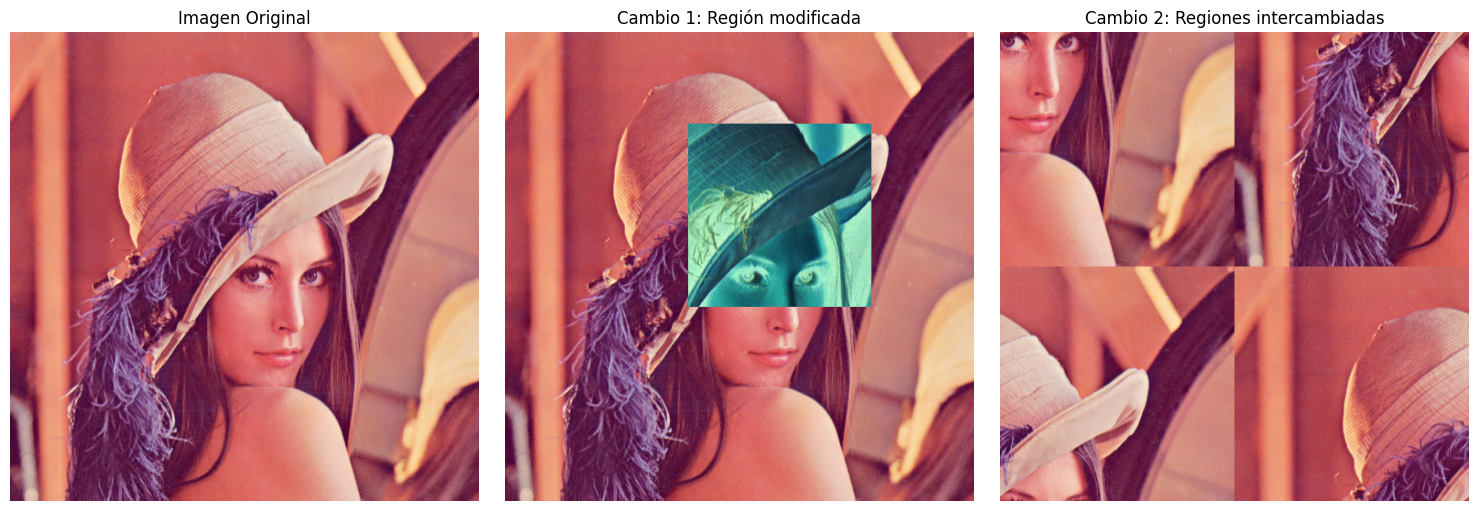

In [27]:
# Mostrar las imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_regions)
plt.title('Cambio 1: Región modificada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_swap)
plt.title('Cambio 2: Regiones intercambiadas')
plt.axis('off')

plt.tight_layout()
plt.show()

Ejercicio 2: Graba un video de unos segundos de tu cara moviéndose por la pantalla (que no se quede fija en el centro solamente) con tu webcam del ordenador. Haz un detector de caras con dicho vídeo. Asegúrate de que tu cara está correctamente iluminada, ya que el modelo es bastante sensible.

Extra: intenta hacerlo con vídeo en directo tomado desde tu webcam.

In [21]:
import cv2 as cv
from IPython.display import display, Image, clear_output
import PIL.Image
import io

# Cargar el clasificador de rostros
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Iniciar la captura de vídeo desde la webcam
cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la webcam.")
    cap.release()
else:
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Error: No se pudo leer el fotograma.")
                break

            # Convertir a escala de grises
            gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Dibujar rectángulos alrededor de las caras
            for (x, y, w, h) in faces:
                cv.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Convertir el frame a una imagen de PIL para mostrarla en Jupyter
            _, buffer = cv.imencode('.jpg', frame)
            img = PIL.Image.open(io.BytesIO(buffer))
            clear_output(wait=True)
            display(img)

    except KeyboardInterrupt:
        print("Interrupción manual. Cerrando cámara...")

    finally:
        cap.release()
        print("Cámara liberada.")


Interrupción manual. Cerrando cámara...
Cámara liberada.


Ejercicio Extra (para los que hayan terminado lo anterior)

Había una vez, un caracol con el que se metían mucho. Tanto era así, que decidió apuntarse a un gimnasio para ponerse súper fuerte para darle una paliza a todo el mundo. Sin embargo, no era capaz de apuntarse. Vuestra tarea será conseguir que el caracol se haga un selfie mientras está entrenando y le ponga un hashtag a la foto del siguiente modo:

![Original](./Resources/Exercise/gym_snail.png "selfie")

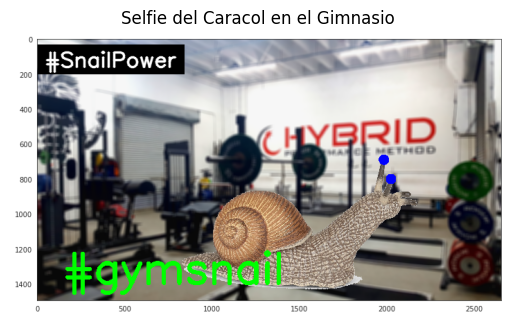

✅ Imagen guardada correctamente en: /mnt/data/gym_snail_selfie.png


In [17]:
# Cargar la imagen del caracol
image_path = 'resources/Exercise\gym_snail.png'
image = cv.imread(image_path)

# Validar si la imagen se cargó correctamente
if image is None:
    print("Error: No se pudo cargar la imagen del caracol.")
else:
    # Convertir a RGB para mostrar correctamente con matplotlib
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    # Añadir un hashtag a la imagen
    hashtag = "#SnailPower"
    font = cv.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_color = (255, 255, 255)  # Blanco
    thickness = 2
    position = (50, 50)  # Posición del texto en la imagen

    # Dibujar un fondo para el texto (opcional)
    (text_width, text_height), _ = cv.getTextSize(hashtag, font, font_scale, thickness)
    background_top_left = (position[0]-10, position[1]-text_height-10)
    background_bottom_right = (position[0]+text_width+10, position[1]+10)
    cv.rectangle(image, background_top_left, background_bottom_right, (0, 0, 0), -1)

    # Añadir el hashtag
    cv.putText(image, hashtag, position, font, font_scale, font_color, thickness, cv.LINE_AA)
    
    # Mostrar la imagen final con el hashtag
    plt.imshow(image)
    plt.title('Selfie del Caracol en el Gimnasio')
    plt.axis('off')
    plt.show()
    
    # Guardar la imagen
    output_path = '/mnt/data/gym_snail_selfie.png'
    image_bgr = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    cv.imwrite(output_path, image_bgr)
    print(f"✅ Imagen guardada correctamente en: {output_path}")
